# Lesson 2a: Packages, libraries & modules

> The Python source distribution has long maintained the philosophy of "batteries included" -- having a rich and versatile standard library which is immediately available, without making the user download separate packages. This gives the Python language a head start in many projects.
>
> \- PEP 206

One feature of Python that makes it useful for a wide range of tasks is the fact that it comes “batteries included” – that is, the Python standard library contains useful tools for a wide range of tasks. On top of this, there is a broad ecosystem of third-party tools and packages that offer more specialized functionality. 

## Learning objectives

By the end of this lesson you'll be able to:

- Explain the difference between the standard library and third-party libraries.
- Use importing tools to install libraries.
- Understand at a high-level what some commonly used third-party libraries provide.
- Have a more complete picture of Python's data science packaging ecosystem.

## Terminology

```{admonition} Video 🎥:
<iframe width="560" height="315" src="https://www.youtube.com/embed/V9nns19WwPE?si=GjmLK01ePqyjcVKt" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
```

People often use the terms _"package"_, _"library"_, and _"module"_ synonymously. If you are familiar with the R programming language you've probably heard some of these terms before. Although there are some semantical differences between R and Python, here is how you can think of the two terms:

A **package** generally refers to source code that is bundled up in a way that a package manager can host. [PyPI](https://pypi.org/) and [Anaconda](https://anaconda.org/anaconda/repo) are the two primary public package managers for Python. When you `pip install pkg` or `conda install pkg` you are installing the `pkg` package from PyPI or Anaconda, respectively, to your computer or the server you’re working on.

A **library**: generally refers to a centralized location on an operating system where installed package source code resides and can be imported into a current session. When you use `pip list` or `conda list` you will see a list of installed packages, which we often refer to as _libraries_. 

```{note}
Below is a list of packages installed in my environment. This will differ from what you get because you likely have not installed these packages yet. Also, again notice the `%` symbol before `pip list`; we call this a [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html). If you were in a terminal you would just run `pip list` but in Jupyter, we can use `%` to tell Jupyter to run this as a terminal command but from the notebook cell.
```

In [1]:
%pip list

Package                       Version   Editable project location
----------------------------- --------- ----------------------------------
absl-py                       0.15.0
alabaster                     0.7.12
alembic                       1.4.1
anyio                         3.3.0
appdirs                       1.4.4
appnope                       0.1.2
argcomplete                   1.12.2
argon2-cffi                   20.1.0
arrow                         1.2.1
astroid                       2.5.3
astunparse                    1.6.3
async-generator               1.10
attrs                         21.2.0
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.10.0
binaryornot                   0.4.4
black                         21.12b0
blackcellmagic                0.0.3
bleach                        4.0.0
blessings                     1.7
bokeh                         2.4.2
bpython                       0.21
bs4                        

When you run `sys.path` you will get the path to the library where your installed packages are stored. Again, your paths will differ but just realize that these are the locations that Python will search for a library when you run `import some_package`.

In [2]:
import sys

sys.path

['/Users/b294776/Desktop/Workspace/Training/UC/uc-bana-6043/book/02-module',
 '/usr/local/bin/python3.7',
 '/Users/b294776/.pyenv/versions/3.9.4/lib/python39.zip',
 '/Users/b294776/.pyenv/versions/3.9.4/lib/python3.9',
 '/Users/b294776/.pyenv/versions/3.9.4/lib/python3.9/lib-dynload',
 '',
 '/Users/b294776/.pyenv/versions/3.9.4/lib/python3.9/site-packages',
 '/Users/b294776/Desktop/sphinx_demo',
 '/Users/b294776/.pyenv/versions/3.9.4/lib/python3.9/site-packages/IPython/extensions',
 '/Users/b294776/.ipython',
 '/Users/b294776/.local/lib/python3.9/site-packages']

A **module** is the broard term used for any code you are importing from outside your current script/notebook. This may include libraries installed on your computer or it may also include stand alone .py files that you created to hold support functions for your current analysis and you want to import them into your current notebook.

For example, I have a simple hello.py file that I included in my current directory with the following function:

```python
def hello_world(name):
    print(f"Hello {name}")
```

Don't worry about the details of the code. The point I want to make is I can import this module and use the `hello_world()` function I created with the following:

In [3]:
from hello import hello_world

hello_world('Brad')

Hello Brad


## Importing

In the code above you saw the `import` statement. The `import` statement allows us to import code from another module. There are a few ways to use the statement, which we will mention briefly here, from most recommended to least recommended.

```{admonition} Video 🎥:
<iframe width="560" height="315" src="https://www.youtube.com/embed/TC7xw7s1LlQ?si=g5qTuSproeXnFheq" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
```

### Explicit module import

Explicit import of a module preserves the module’s content in a namespace. The namespace is then used to refer to its contents with a dot (".") between them. 

```{note}
Everything in Python is an object, so if we want to access the methods and attributes available inside an object, we use dot syntax. This is no different when we import a module. Python treats the module as an object and we can access anything in that module via dot syntax.
```

For example, here we’ll import the built-in `math` module and compute the cosine of pi:

In [4]:
import math

x = math.cos(math.pi)
x

-1.0

### Explicit module import by alias

For longer module names, it’s not convenient to use the full module name each time you access some element. For this reason, we’ll commonly use the `import ... as ...` pattern to create a shorter _alias_ for the namespace. For example, the NumPy (Numerical Python) package, a popular third-party package useful for data science, is by convention imported under the alias `np`:

In [5]:
import numpy as np

x = np.cos(np.pi)
x

-1.0

### Explicit import of module contents

Sometimes rather than importing the module namespace, you would just like to import a few particular items from the module. This can be done with the `from ... import ...` pattern. For example, we can import just the `cos` function and the `pi` constant from the math module:

In [6]:
from math import cos, pi

x = cos(pi)
x

-1.0

###  Implicit import of module contents

Finally, it is sometimes useful to import the entirety of the module contents into the local namespace. This can be done with the `from ... import *` pattern:

In [7]:
from math import *

x = sin(pi) ** 2 + cos(pi) ** 2
x

1.0

```{warning}
This pattern should be used sparingly, if at all. The problem is that such imports can sometimes overwrite function names that you do not intend to overwrite, and the implicitness of the statement makes it difficult to determine what has changed.
```

For example, Python has a built-in sum function that can be used for various operations:

In [8]:
sum(range(5), -1)

9

Now observe what happens if we make the exact same function call after importing `*` (everything) from `numpy`:

In [9]:
from numpy import *

sum(range(5), -1)

10

The result is off by one! The reason for this is that the `import *` statement replaces the built-in `sum` function with the `numpy.sum` function, which has a different call signature. 

```{tip}
Implicit module importing is generally frowned upon and in this class I expect you to use one of the three explicit importing approaches
```

## Standard library

```{admonition} Video 🎥:
<iframe width="560" height="315" src="https://www.youtube.com/embed/VcGC2MCxtuQ?si=DvI7cffFtohNJq3Z" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
```

In the above code we've seen a few different libraries installed (`math` and `numpy`). These libraries represent two of the many readily available libraries at your disposal. However, we refer to the `math` library is part of the **standard library** and the `numpy` library is considered a **third party library**.



So far we've seen several data types that Python offers out-of-the-box.
However, to keep things organized, some Python functionality is stored in standalone *packages*, or libraries of code.
The word "module" is generally synonymous with package; you will hear both in discussions of Python.

Some packages, like `math`, are bundled with every Python install; downloading Python guarantees you'll have these packages.
Collectively, this group of packages is known as the *standard library*.

Python’s standard library contains many useful built-in modules, which you can read about fully in [Python’s documentation](https://docs.python.org/3/library/). Any of these can be imported with the `import` statement, and then explored using the help function seen in the previous module. Here is an extremely incomplete list of some of the modules you might wish to explore and learn about:

- `os` and `sys`: Tools for interfacing with the operating system, including navigating file directory structures and executing shell commands
- `math` and `cmath`: Mathematical functions and operations on real and complex numbers
- `itertools`: Tools for constructing and interacting with iterators and generators
- `functools`: Tools that assist with functional programming
- `random`: Tools for generating pseudorandom numbers
- `pickle`: Tools for object persistence: saving objects to and loading objects from disk
- `json` and `csv`: Tools for reading JSON-formatted and CSV-formatted files.
- `urllib`: Tools for doing HTTP and other web requests.

You can find information on these, and many more, in the Python standard library documentation: https://docs.python.org/3/library/.

For example, functionality related to the operating system -- such as creating files and folders -- is stored in a package called `os`.
To use the tools in `os`, we *import* the package.

In [10]:
import os

Once we import it, we gain access to everything inside. With Jupyter's autocomplete, we can type `os.` and hit tab to see a list of available functions. In this example I use `os.getcwd()` to print out the current working directory I am in.

In [11]:
# Move your cursor to the end of the below line and press tab.
os.getcwd()

'/Users/b294776/Desktop/Workspace/Training/UC/uc-bana-6043/book/02-module'

### Knowledge check

```{admonition} Questions:
:class: attention
1. Go to the standard library documentation and read about the `random` library.
2. Identify the function that will allow you to generate random integers.
3. Import this function from the `random` package.
4. Generate a random integer between the values 0-10.
```

## Third-party modules

```{admonition} Video 🎥:
<iframe width="560" height="315" src="https://www.youtube.com/embed/92g6VoMOXgU?si=SK8whKIEVuXWXzzH" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
```

One of the things that makes Python useful, especially within the world of data science, is its ecosystem of third-party modules. These can be imported just as the built-in modules, but first the modules must be installed on your system. As previously mentioned, [Python Package Index](https://pypi.org/) (PyPI for short) and [Anaconda](https://anaconda.org/anaconda/repo) are the two primary public package managers for Python.  To install packages from these locations we just use the following:

```bash
# install from PyPI
pip install pkg_name

# install from Anaconda
conda install pkg_name
```

```{note}
There are currently (May 1, 2022) about 370,000 packages available through the Python Package Index, PyPI. Usually, you can ask Google about what you are trying to do, and there is often a third party module to help you do it. The most useful (for scientific computing) and thoroughly tested packages and modules are available using `conda`. Others can be installed using `pip`.
```

We will extensively use the Numpy, SciPy, Pandas, and Bokeh packages, among others, in this class, and I’m sure you will also use them beyond. Let's look at some examples of these third party packages to give you a flavor of what they do. Don't worry, we'll go into some of these more thoroughly in later lessons!

### NumPy

[NumPy](https://numpy.org/) provides an efficient way to store and manipulate multi-dimensional dense arrays in Python. The important features of NumPy are:

* It provides an ndarray structure, which allows efficient storage and manipulation of vectors, matrices, and higher-dimensional datasets.
* It provides a readable and efficient syntax for operating on this data, from simple element-wise arithmetic to more complicated linear algebraic operations.

```{}
Although the package is officially spelled "NumPy" you will commonly see it referred to as Numpy and numpy across the Python ecosystem (and even within this course).
```

In the simplest case, NumPy arrays look a lot like Python lists. For example, here is an array containing the range of numbers 1 to 9:

In [12]:
import numpy as np

x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

```{tip}
Standard convention is to import numpy as the **np** alias.
```

NumPy’s arrays offer both efficient storage of data, as well as efficient element-wise operations on the data. For example, to square each element of the array, we can apply the “**” operator to the array directly:

In [13]:
x ** 2


array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

This element-wise operation capability (commonly referred to as __vectorization__) is extremely useful but is not available in base Python. In base Python, if you had a list of these same numbers you would have to loop through each element in the list and compute the square of each number:

In [14]:
x_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# not supported
x_list ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

We would need to use a non-vectorized approach that iterates through each element and computes the square. The below illustrates the much more verbose non-vectorized approach that produces the same result:

```{note}
Don't worry about the syntax, you will learn about this in a later lesson. Just note how the above approach with Numpy is far more convenient!
```

In [15]:
x_squared = [val ** 2 for val in x_list]
x_squared

[1, 4, 9, 16, 25, 36, 49, 64, 81]

Numpy also provides a host of other vectorized arithmetic capabilities. For example, we can compute the mean of a list with the following:

In [16]:
np.mean([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

5.5

Unlike Python lists (which are limited to one dimension), NumPy arrays can be multi-dimensional. For example, here we will reshape our `x` array into a 3x3 matrix:

In [17]:
m = x.reshape((3, 3))
m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

A two-dimensional array is one representation of a matrix, and NumPy knows how to efficiently do typical matrix operations. For example, you can compute the transpose using `.T`:

In [18]:
m.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

or a matrix-vector product using `np.dot`:

In [19]:
np.dot(m, [5, 6, 7])

array([ 38,  92, 146])

and even more sophisticated operations like eigenvalue decomposition:

In [20]:
np.linalg.eigvals(m)

array([ 1.61168440e+01, -1.11684397e+00, -1.30367773e-15])

```{note}
Such linear algebraic manipulation underpins much of modern data analysis, particularly when it comes to the fields of machine learning and data mining.
```

### Pandas

[Pandas](https://pandas.pydata.org/) is a much newer package than Numpy, and is in fact built on top of it. What Pandas provides is a labeled interface to multi-dimensional data, in the form of a DataFrame object that will feel very familiar to users of R and related languages. DataFrames in Pandas look something like the following.

```{tip}
It is a common convention to import Pandas with the **pd** alias.
```

In [21]:
import pandas as pd

df = pd.DataFrame({'label': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'value': [1, 2, 3, 4, 5, 6]})

```{note}
In practice, rarely do we create a DataFrame in this manner; most of the time we are importing data from a tabular file (i.e. CSV) into a DataFrame. However, this is only for the purpose of providing some simple examples
```

The Pandas interface allows you to do things like select columns by name:

In [22]:
df['label']

0    A
1    B
2    C
3    A
4    B
5    C
Name: label, dtype: object

Apply string operations across string entries:

In [23]:
df['label'].str.lower()

0    a
1    b
2    c
3    a
4    b
5    c
Name: label, dtype: object

Compute statistical aggregations for numerical columns:


In [24]:
df['value'].sum()

21

And, perhaps most importantly, do efficient database-style joins and groupings:

In [25]:
df.groupby('label').sum()


value
label       
A          5
B          7
C          9

Here in one line we have computed the sum of all objects sharing the same label, something that is much more verbose (and much less efficient) using tools provided in Numpy and core Python. 

```{note}
In future lessons we will go much deeper into Pandas and you'll also see a large dependency on using Pandas as we start exploring other parts of the statistical computing ecosystem (i.e. visualization, machine learning).
```

### Matplotlib

Matplotlib is currently the most popular scientific visualization packages in Python. Even proponents admit that its interface is sometimes overly verbose, but it is a powerful library for creating a large range of plots.

```{tip}
It is a common convention to import Matplotlib with the **plt** alias.
```

In [26]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # make graphs in the style of R's ggplot

Now let’s create some data and plot the results:

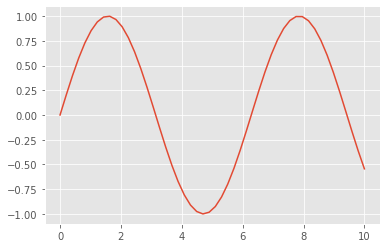

In [27]:
x = np.linspace(0, 10)  # range of values from 0 to 10
y = np.sin(x)           # sine of these values
plt.plot(x, y);         # plot as a line

This is the simplest example of a Matplotlib plot; for ideas on the wide range of plot types available, see [Matplotlib’s online gallery](https://matplotlib.org/gallery.html). 

```{note}
Although you'll be exposed to some Matplotlib throughout this course, we will tend to focus on other third-party visualization packages that are simpler to use.
```

### SciPy

**[SciPy](https://scipy.org/)** is a collection of scientific functionality that is built on Numpy. The package began as a set of Python wrappers to well-known Fortran libraries for numerical computing, and has grown from there. The package is arranged as a set of submodules, each implementing some class of numerical algorithms. Here is an incomplete sample of some of the more important ones for data science:

- scipy.fftpack: Fast Fourier transforms
- scipy.integrate: Numerical integration
- scipy.interpolate: Numerical interpolation
- scipy.linalg: Linear algebra routines
- scipy.optimize: Numerical optimization of functions
- scipy.sparse: Sparse matrix storage and linear algebra
- scipy.stats: Statistical analysis routines

For example, let’s take a look at interpolating a smooth curve between some data

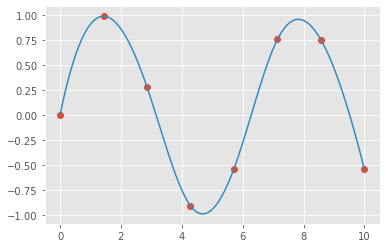

In [28]:
from scipy import interpolate

# choose eight points between 0 and 10
x = np.linspace(0, 10, 8)
y = np.sin(x)

# create a cubic interpolation function
func = interpolate.interp1d(x, y, kind='cubic')

# interpolate on a grid of 1,000 points
x_interp = np.linspace(0, 10, 1000)
y_interp = func(x_interp)

# plot the results
plt.figure()  # new figure
plt.plot(x, y, 'o')
plt.plot(x_interp, y_interp);

What we see is a smooth interpolation between the points.

### Other Data Science Packages

Built on top of these tools are a host of other data science packages, including general tools like [Scikit-Learn](http://scikit-learn.org/) for machine learning, [Scikit-Image](http://scikit-image.org/) for image analysis, [Seaborn](https://seaborn.pydata.org/) for statistical visualization, and [Statsmodels](http://statsmodels.sourceforge.net/) for statistical modeling; as well as more domain-specific packages like [AstroPy](http://astropy.org/) for astronomy and astrophysics, [NiPy](http://nipy.org/) for neuro-imaging, and many, many more.

No matter what type of scientific, numerical, or statistical problem you are facing, it’s likely there is a Python package out there that can help you solve it.

## Exercises

```{admonition} Tasks:
:class: attention
1. Spend some time familiarizing yourself with the [Pandas documentation](https://pandas.pydata.org/).
2. Watch the Pandas in 10 minutes video on the [Getting Started](https://pandas.pydata.org/getting_started.html) page.
3. Read [A landscape diagram for Python data](https://community.ibm.com/community/user/datascience/blogs/paco-nathan/2019/03/12/a-landscape-diagram-for-python-data)
4. Read [20 Python Libraries Every Data Scientist Needs to Know](https://builtin.com/data-science/python-libraries-data-science)
```

## Computing environment

In [29]:
%load_ext watermark
%watermark -v -p jupyterlab,numpy,pandas,matplotlib,scipy

Python implementation: CPython
Python version       : 3.9.4
IPython version      : 7.26.0

jupyterlab: 3.1.4
numpy     : 1.19.5
pandas    : 1.2.4
matplotlib: 3.4.3
scipy     : 1.7.1

